# Imports

In [172]:
import pandas as pd
import numpy as np

# Loading Data

In [173]:
df = pd.read_csv('dataset/tech_layoffs.csv')

In [174]:
df.head(10)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
7,Foxtrot,26,4,9/23/2022,"food and beverage, e-commerce",Chicago,Chicago Business,Private,NaN
8,Headspace Health,50,4,12/14/2022,"telehealth, wellness",Los Angeles,Bloomberg,Private,NaN
9,RealSelf,11,5,7/21/2022,Beauty tech,Seattle,GeekWire,Private,NaN


# Understanding of Data

In [175]:
df.dtypes

company                          object
total_layoffs                    object
impacted_workforce_percentage    object
reported_date                    object
industry                         object
headquarter_location             object
sources                          object
status                           object
additional_notes                 object
dtype: object

In [176]:
df['reported_date'] = pd.to_datetime( df['reported_date'] )

In [177]:
# Verificando as colunas numéricas no dataset

from pandas.api.types import is_numeric_dtype

numeric_cols = ['total_layoffs', 'impacted_workforce_percentage']
cols = df.columns

for x in cols:
    if is_numeric_dtype( df[x]) == False:
        print(x)


company
total_layoffs
impacted_workforce_percentage
reported_date
industry
headquarter_location
sources
status
additional_notes


As colunas 'total_layoffs' e 'impacted_workforce_percentage'não estão com o tipo numérico

In [178]:
# Converter a coluna 'total_layoffs' para tipo numérico

df['total_layoffs'] = df['total_layoffs'].astype(str)

total_layoffs_converted = []

for x in df['total_layoffs']:
    if not x.isnumeric():
        total_layoffs_converted.append(0)
    
    else:
        total_layoffs_converted.append( int(x))

df['total_layoffs'] = total_layoffs_converted



In [179]:
# Realizando a mesma operação só que utilizando a função lambda
df['total_layoffs'] = df['total_layoffs'].astype(str)
df['total_layoffs'] = df['total_layoffs'].apply( lambda x:0 if not x.isnumeric() else int(x))

In [180]:
# Converter a coluna 'impacted_workforce_percentage' para tipo numérico

df['impacted_workforce_percentage'] = df['impacted_workforce_percentage'].astype(str)

value_converted = []

for x in df['impacted_workforce_percentage']:
    if not x.isnumeric():
        value_converted.append(0)
        
    else:
        value_converted.append( int(x))

df['impacted_workforce_percentage'] = value_converted

In [181]:
df.dtypes

company                                  object
total_layoffs                             int64
impacted_workforce_percentage             int64
reported_date                    datetime64[ns]
industry                                 object
headquarter_location                     object
sources                                  object
status                                   object
additional_notes                         object
dtype: object

# Using Loop Python

**Verificando a % de valores nulos do dataset**

In [182]:
for x in df.columns:
    if df[x].isnull:
        print(x, df[x].isnull().sum()*100 / df.shape[0])

company 0.0
total_layoffs 0.0
impacted_workforce_percentage 0.0
reported_date 0.0
industry 0.0
headquarter_location 0.0
sources 0.0
status 0.0
additional_notes 95.50102249488752


**Dividindo a palavra da coluna industria**

In [183]:
list_industry = []

for x in df['industry'].to_list():
    list_industry.append(x.split(' ')[-1])
    
# Converter os valores da lista em letras minúsculas
list_industry = [x.lower() for x in list_industry]

# Remover caracteres como hífen
list_industry = [x.replace('-', '') for x in list_industry]

df['industry'] = list_industry

**Fazendo a mesma operação para a coluna 'headquarter_location'***

In [184]:
list_location = []

for x in df['headquarter_location'].to_list():
    list_location.append( x.split(' ') [-1])

# Converter os valores da lista em letras minúsculas
list_location = [x.lower() for x in list_location]

# Remover caracteres com hífen
list_location = [x.replace('-', '') for x in list_location]
    
df['headquarter_location'] = list_location

# Gerando os gráfico da distribuição com Loop

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

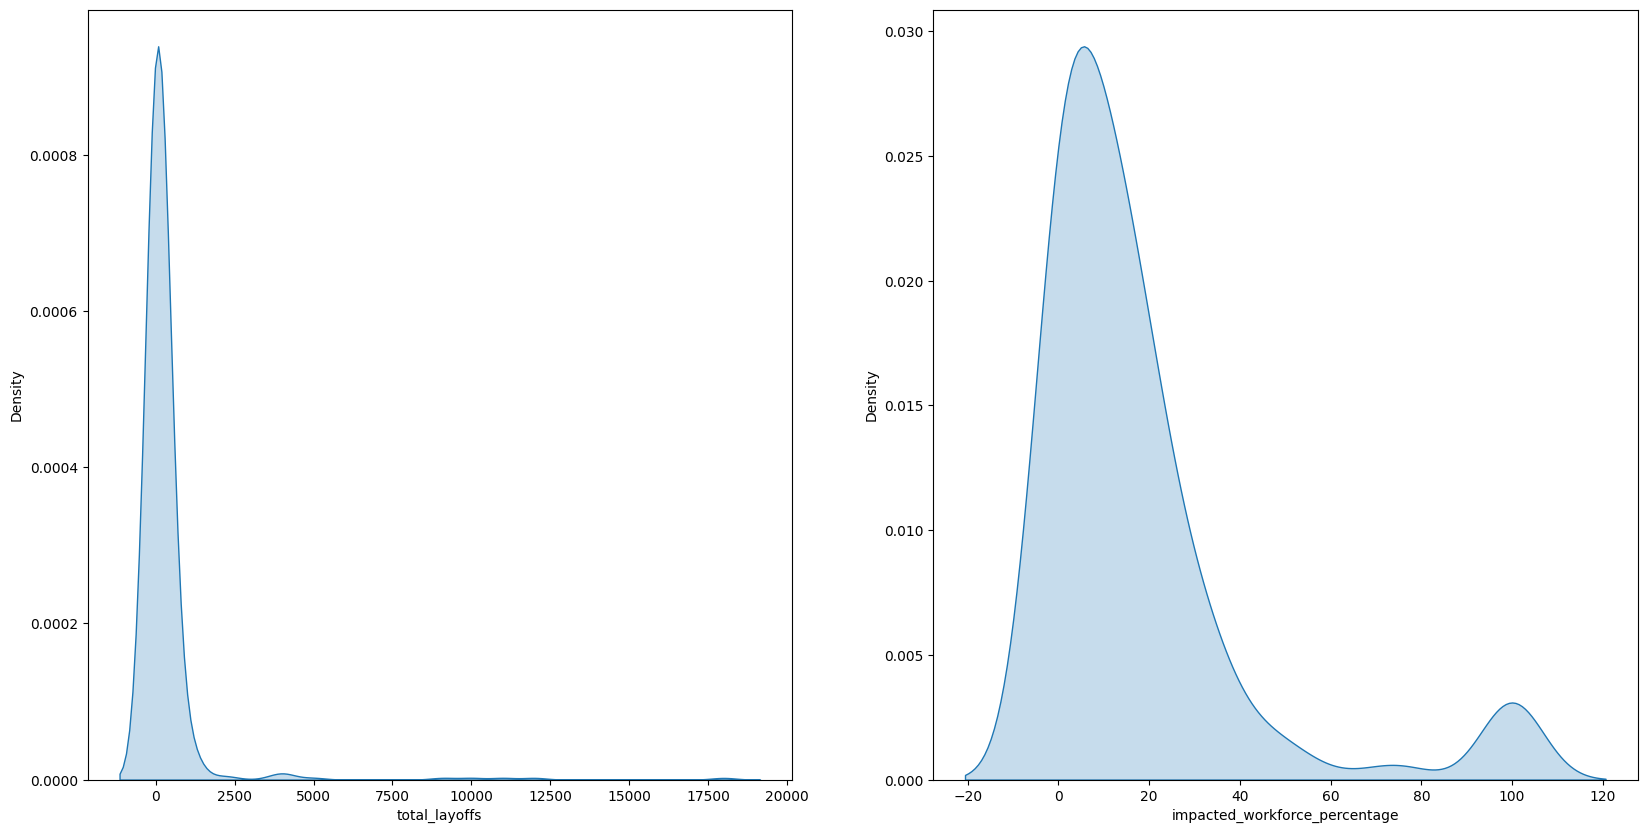

In [186]:
numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes( include = numerics)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in df_numeric.items():
    sns.kdeplot( v, ax=axs[index], fill=True)
    index += 1

## Top 10 empresas Layoff

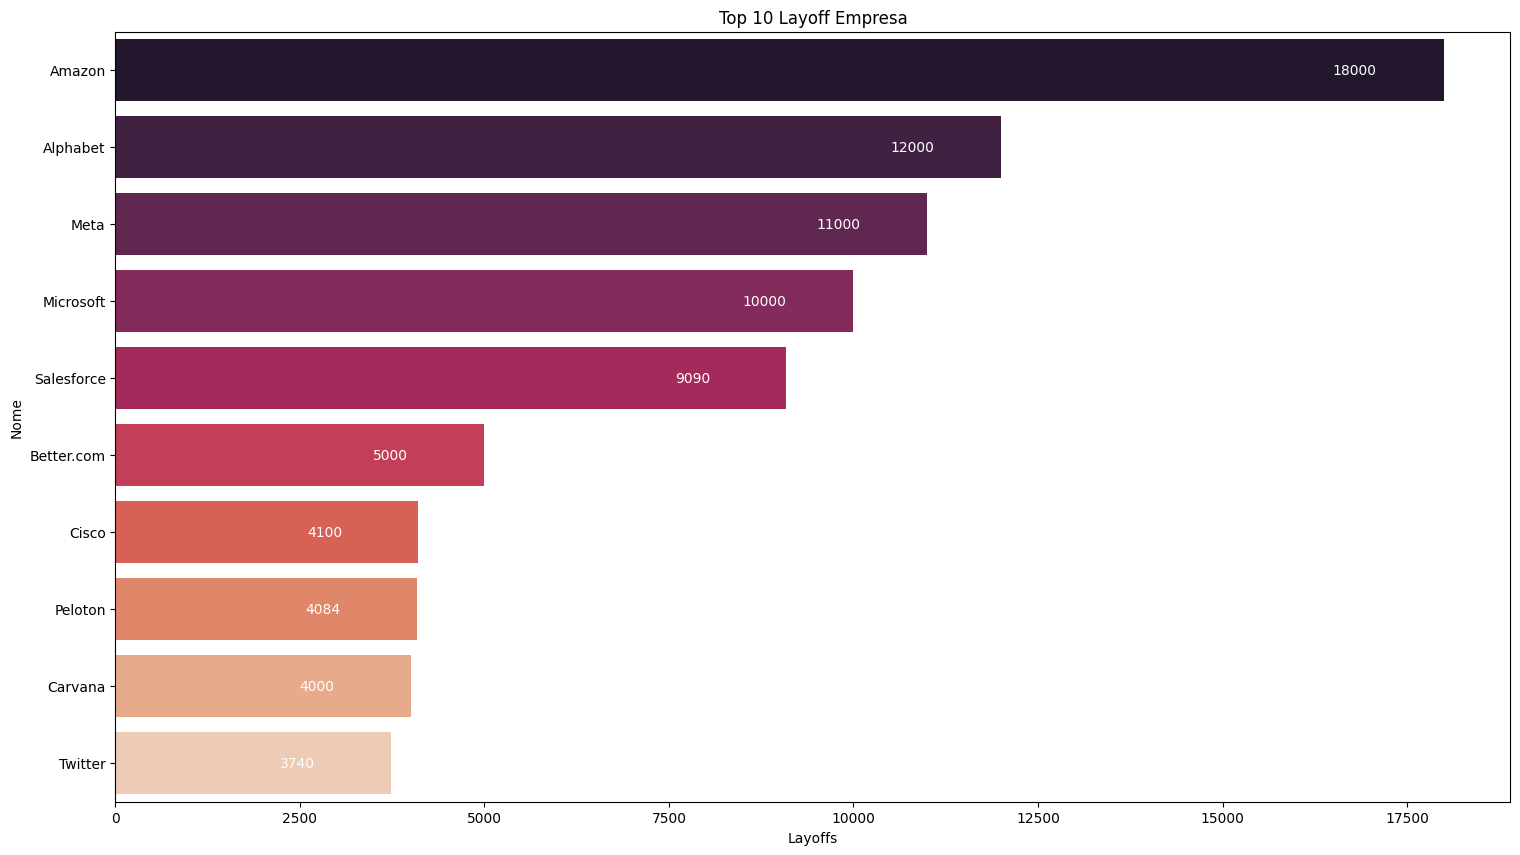

In [187]:
top10_company = df.sort_values('total_layoffs', ascending=False).head(10)

fig, ax = plt.subplots( figsize = (18,10) )
p = sns.barplot( x='total_layoffs', y='company', data= top10_company, ax=ax, palette='rocket')

for container in p.containers:
    p.bar_label( container, padding = -80, color='white' )

plt.title('Top 10 Layoff Empresa')
plt.xlabel('Layoffs')
plt.ylabel('Nome')
plt.show()

## Top 10 Indústrias Layoffs

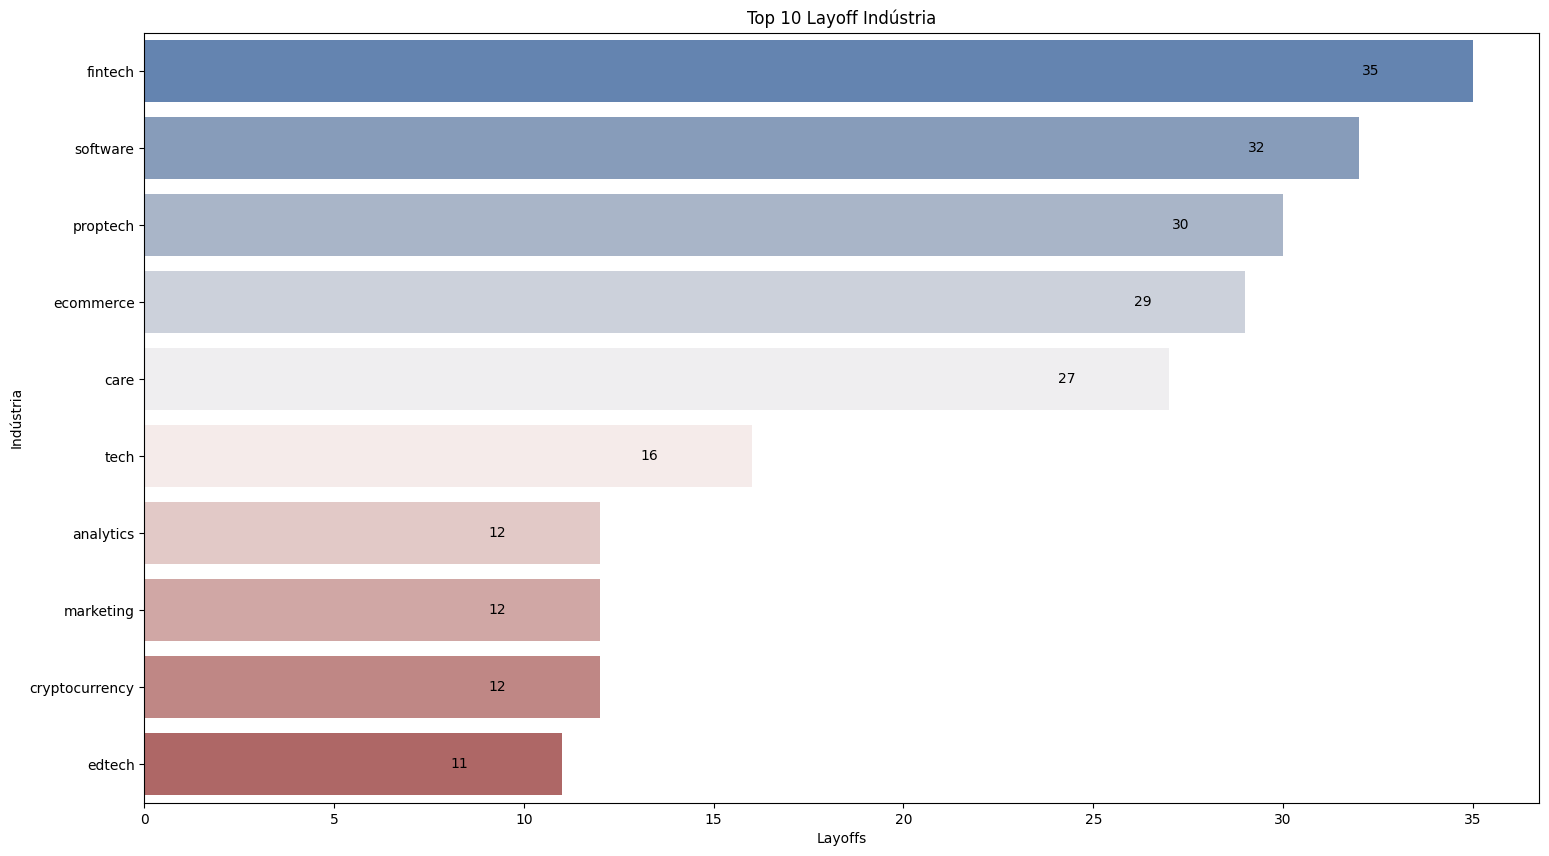

In [188]:
top10_industries = df['industry'].value_counts().head(10)
top10_industries = df.groupby('industry').size().sort_values(ascending=False).head(10)
top10_industries = top10_industries.to_frame().reset_index()

fig, ax = plt.subplots( figsize = (18,10) )
p = sns.barplot(y='industry',x=0, data = top10_industries, ax=ax, palette='vlag')


for container in p.containers:
    p.bar_label( container, padding = -80)

plt.title('Top 10 Layoff Indústria')
plt.xlabel('Layoffs')
plt.ylabel('Indústria')
plt.show()

## Top 10 Localização - Layoffs

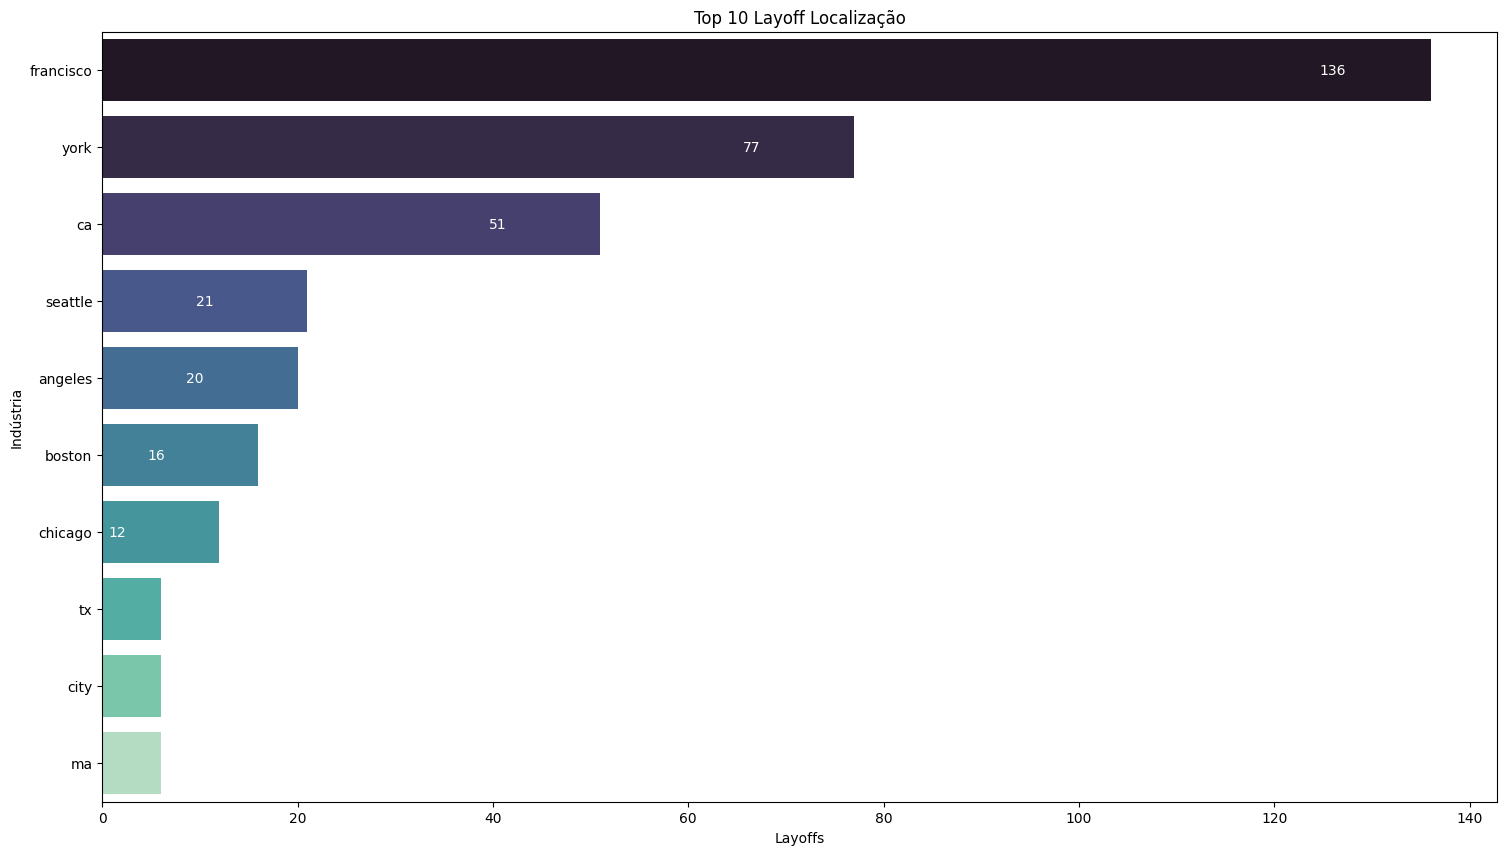

In [198]:
top10_location = df['headquarter_location'].value_counts().head(10)
top10_location = df.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top10_location = top10_location.to_frame().reset_index()

fig, ax = plt.subplots( figsize = (18,10) )

p = sns.barplot(x=0, y='headquarter_location', data = top10_location, ax=ax, palette='mako')


for container in p.containers:
    p.bar_label( container, padding = -80, color='white')

plt.title('Top 10 Layoff Localização')
plt.xlabel('Layoffs')
plt.ylabel('Indústria')
plt.show()